plot time evolution of momentum distribution for different laser beam radii

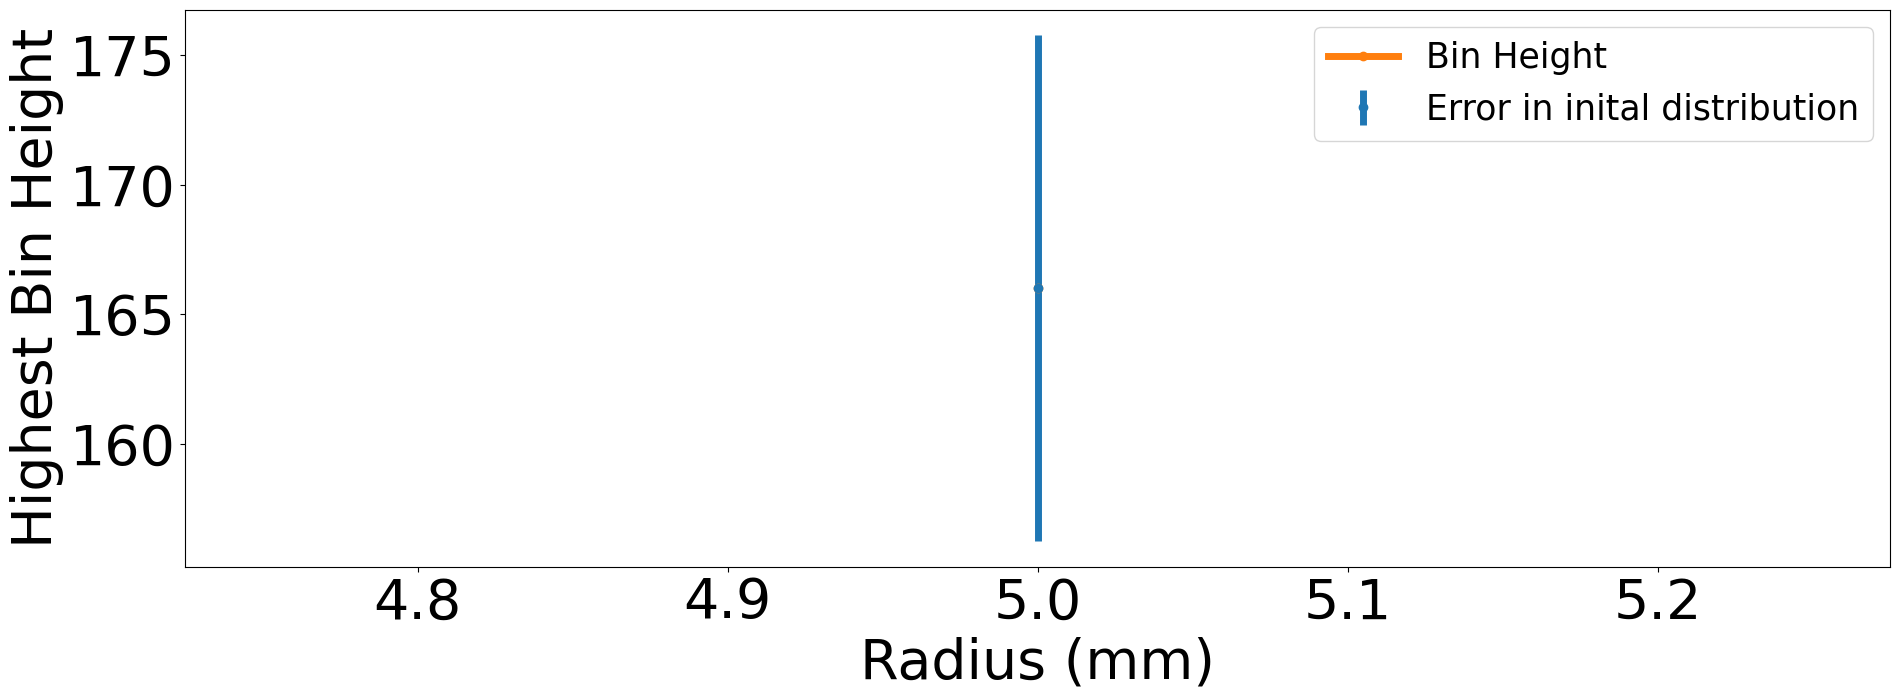

In [1]:
import numpy as np
import matplotlib.pyplot as plt

radius_list = ['5mm']

font_size = 40  # Set your desired font size here
legend_font_size = 25  # Set your desired legend font size here
figure_width = 20
figure_height = 8

max_heights_final_turn = []
std_in_bin_heights_first_turn=[]

for radius in radius_list:
    loaded_data = np.load(f'results/langzhou_data({radius}).npz')
    delta = loaded_data['delta']
    x = loaded_data['x'] * 1e3
    time = loaded_data['time']

    delta_first_turn = delta[0, :]
    delta_final_turn = delta[-1, :]

    bins = np.linspace(0e-4, 1e-4, 100)

    # Compute the histograms without plotting
    counts_first_turn, _ = np.histogram(delta_first_turn, bins=bins)
    counts_final_turn, _ = np.histogram(delta_final_turn, bins=bins)

    # Find the height of the highest bin
    max_height_first_turn = np.max(counts_first_turn)
    max_height_final_turn = np.max(counts_final_turn)

    # Append the heights to the lists
    max_heights_final_turn.append(max_height_final_turn)
    
    std_in_bin_heights_first_turn.append(np.std(counts_first_turn))
    
# Convert radius list to float
radius_list_float = [float(radius[:-2]) for radius in radius_list]

# Plotting the results
plt.figure(figsize=(figure_width, figure_height))
plt.rcParams.update({'font.size': font_size})
plt.errorbar(radius_list_float, max_heights_final_turn, yerr=std_in_bin_heights_first_turn, fmt='o', label='Error in inital distribution', linewidth=5)
plt.plot(radius_list_float, max_heights_final_turn, marker='o', label='Bin Height', linewidth=5)
# plt.scatter(radius_list_float, max_heights_final_turn, label='Final Turn', s=100)  # 's' parameter controls marker size
# plt.errorbar(radius_list_float, max_heights_final_turn, yerr=std_in_bin_heights_first_turn, fmt='none', capsize=5)  # Add error bars
plt.xlabel('Radius (mm)')
plt.ylabel('Highest Bin Height')
plt.legend(fontsize=legend_font_size)
plt.tight_layout()
plt.savefig('Cooling_rate_vs_laser_radius.png', format='png', dpi=300)
plt.show()



For radius 1mm:
  First Turn - Bin with Highest Count: 1.717171717171717e-05
  Final Turn - Bin with Highest Count: 1.717171717171717e-05
  Counts in First Turn at Max Bin of Final Turn: 142

For radius 2.5mm:
  First Turn - Bin with Highest Count: 4.242424242424242e-05
  Final Turn - Bin with Highest Count: 4.242424242424242e-05
  Counts in First Turn at Max Bin of Final Turn: 121

For radius 5mm:
  First Turn - Bin with Highest Count: 1.919191919191919e-05
  Final Turn - Bin with Highest Count: 4.242424242424242e-05
  Counts in First Turn at Max Bin of Final Turn: 112

For radius 10mm:
  First Turn - Bin with Highest Count: 5.4545454545454546e-05
  Final Turn - Bin with Highest Count: 4.3434343434343435e-05
  Counts in First Turn at Max Bin of Final Turn: 95

For radius 20mm:
  First Turn - Bin with Highest Count: 4.6464646464646464e-05
  Final Turn - Bin with Highest Count: 4.4444444444444447e-05
  Counts in First Turn at Max Bin of Final Turn: 99

For radius 25mm:
  First Turn - Bi

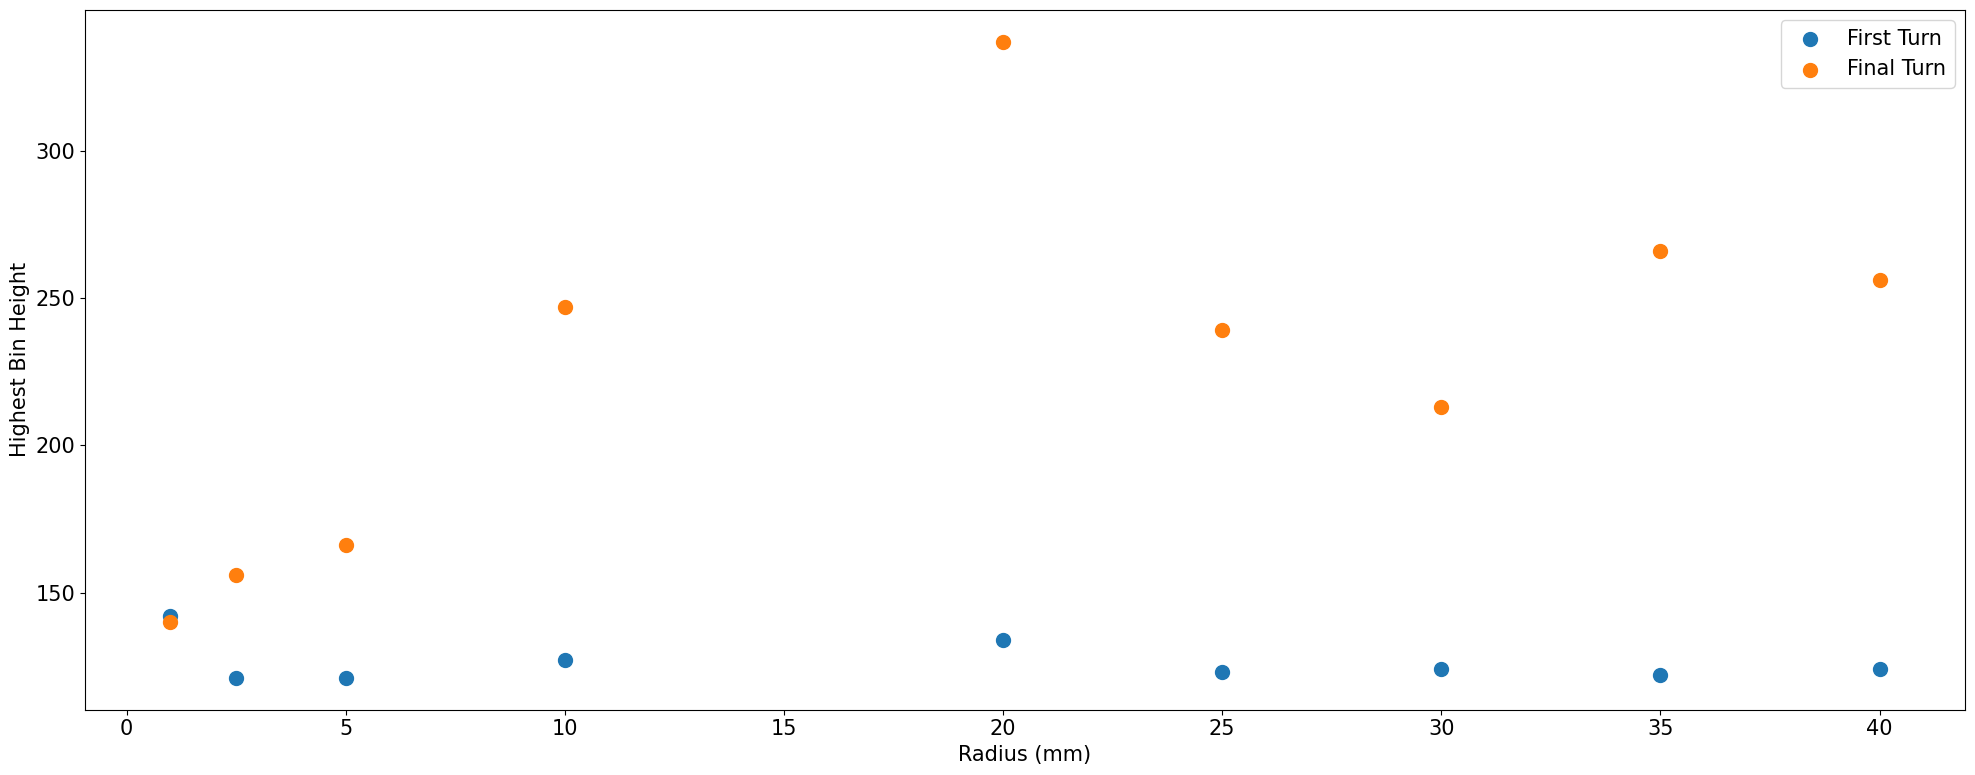

In [2]:
import numpy as np
import matplotlib.pyplot as plt

radius_list = ['1mm', '2.5mm', '5mm', '10mm', '20mm', '25mm', '30mm', '35mm', '40mm']
# radius_list = ['40mm']

max_heights_final_turn = []
max_heights_first_turn = []
counts_in_max_bin_first_turn = []

for radius in radius_list:
    loaded_data = np.load(f'results/langzhou_data({radius}).npz')
    delta = loaded_data['delta']

    delta_first_turn = delta[0, :]
    delta_final_turn = delta[-1, :]

    bins = np.linspace(0e-4, 1e-4, 100)

    # Compute the histograms without plotting
    counts_first_turn, bin_edges_first_turn = np.histogram(delta_first_turn, bins=bins)
    counts_final_turn, bin_edges_final_turn = np.histogram(delta_final_turn, bins=bins)

    # Find the bin with the highest count for both turns
    max_bin_index_first_turn = np.argmax(counts_first_turn)
    max_bin_index_final_turn = np.argmax(counts_final_turn)

    # Get the value of the highest bin for both turns
    max_heights_first_turn.append(counts_first_turn[max_bin_index_first_turn])
    max_heights_final_turn.append(counts_final_turn[max_bin_index_final_turn])

    # Get the counts in the bin with the maximum height for the first turn
    counts_in_max_bin_first_turn.append(counts_first_turn[max_bin_index_final_turn])

    # Print the comparison
    print(f"For radius {radius}:")
    print(f"  First Turn - Bin with Highest Count: {bin_edges_first_turn[max_bin_index_first_turn]}")
    print(f"  Final Turn - Bin with Highest Count: {bin_edges_final_turn[max_bin_index_final_turn]}")
    print(f"  Counts in First Turn at Max Bin of Final Turn: {counts_in_max_bin_first_turn[-1]}")
    print()

# Convert radius list to float
radius_list_float = [float(radius[:-2]) for radius in radius_list]

# Plotting the results
plt.figure(figsize=(20, 8))
plt.rcParams.update({'font.size': 15})
plt.scatter(radius_list_float, max_heights_first_turn, label='First Turn', s=100)
plt.scatter(radius_list_float, max_heights_final_turn, label='Final Turn', s=100)
plt.xlabel('Radius (mm)')
plt.ylabel('Highest Bin Height')
plt.legend()
plt.tight_layout()
plt.show()
